# Example of using the ClearskyCalculator class

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from solar_utils.clearsky_calculator import ClearskyCalculator


In [4]:
# Example usage
lat = 13.7563  # Latitude for Bangkok, Thailand
long = 100.5018  # Longitude for Bangkok, Thailand
site_obj = ClearskyCalculator(lat=lat, long=long)

# Define the data range to calculate clear-sky information

start_date = '2023-01-01'
end_date = '2023-01-02'
freq = '15min'
choice = 'estimate'
solar_info_df = site_obj.get_solar_info(start_date, end_date, freq, choice=choice)
solar_info_df.between_time("07:00", "17:00")

,cos_zna,AM,Iclr
Datetime,,,
2023-01-01 07:00:00,0.055666,14.516218,15.243154
2023-01-01 07:15:00,0.112997,8.262170,58.192904
2023-01-01 07:30:00,0.169446,5.715871,112.855083
2023-01-01 07:45:00,0.224770,4.370012,171.499444
2023-01-01 08:00:00,0.278734,3.547530,231.094824
...,...,...,...
2023-01-02 16:00:00,0.427119,2.331447,400.396728
2023-01-02 16:15:00,0.378403,2.627913,344.264509
2023-01-02 16:30:00,0.327669,3.028079,286.299905


<Axes: xlabel='Datetime'>

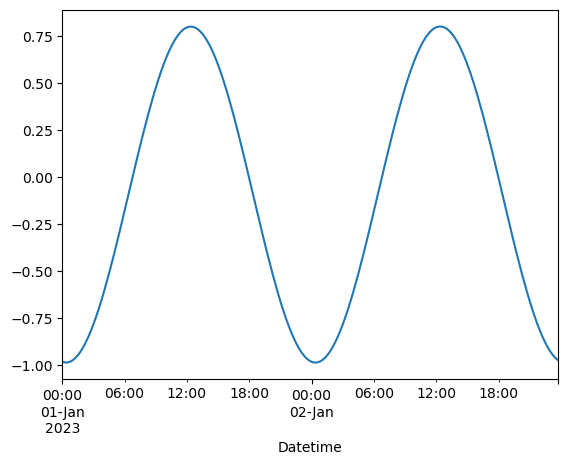

In [6]:
# explore some variable
solar_info_df['cos_zna'].plot()

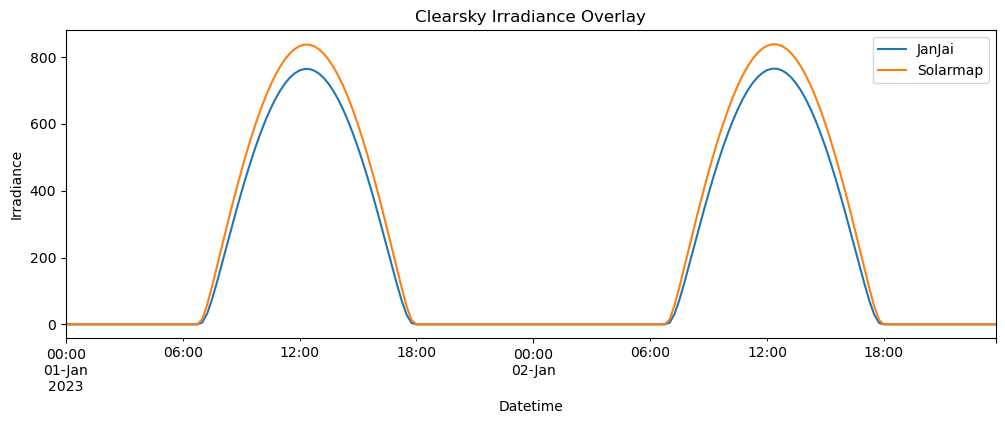

In [7]:
# Compare clear-sky irradiance that calculated from different TL 

import matplotlib.pyplot as plt
jj_iclr_df = site_obj.cal_clearsky_irradiance(start_date=start_date, end_date=end_date, choice='JanJai', freq='15min')
solarmap_iclr_df = site_obj.cal_clearsky_irradiance(start_date=start_date, end_date=end_date, choice='estimate', freq='15min')


# Create a single graph and plot both datasets on it

fig, ax = plt.subplots(figsize=(12, 4))

jj_iclr_df['Iclr'].plot(ax=ax, title='Clearsky Irradiance Overlay', label='JanJai')
solarmap_iclr_df['Iclr'].plot(ax=ax, label='Solarmap')

# Customize the graph as needed

ax.set_xlabel('Datetime')
ax.set_ylabel('Irradiance')
ax.legend(loc='upper right')

plt.show()